In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from os import walk
from tqdm import tqdm
import pysam
from Bio.Seq import Seq

In [2]:
import json
f = open('/home/mark/Desktop/chromosome_y/json_dict/HG01890_cluster.json') 
T2T_dict = json.load(f) 

In [3]:
T2T_startStopDict = {key:[] for key in T2T_dict.keys()}
for key in T2T_startStopDict.keys():
    T2T_startStopDict[key].append(T2T_dict[key][0][0].split(" ")[6].strip())
    T2T_startStopDict[key].append(T2T_dict[key][-1][-1].split(" ")[7].strip())

In [4]:
T2T_startStopDict

{'0': ['29823871', '29857041'],
 '1': ['30203322', '30295248'],
 '2': ['30645332', '30666368'],
 '3': ['32095446', '32326802'],
 '4': ['33301785', '33575578'],
 '5': ['34296876', '34358917'],
 '6': ['34364640', '34473437'],
 '7': ['35308683', '35545473'],
 '8': ['36090560', '36293831'],
 '9': ['37078637', '37730854'],
 '10': ['38023000', '38416458'],
 '11': ['38847093', '40825752'],
 '12': ['41267031', '41464375'],
 '13': ['41795367', '43443099'],
 '14': ['44387310', '44546472'],
 '15': ['45030984', '45138567'],
 '16': ['45796966', '45822760'],
 '17': ['46041949', '46065018'],
 '18': ['46075790', '46095889'],
 '19': ['46105901', '46127101'],
 '20': ['46133501', '46162589']}

In [5]:
samtools='temp'
with open('/home/mark/Desktop/chromosome_y/assemblies/repeatmasker/postMay232022/finalized/HG01890_finalized.txt') as f:
    Lines = f.readlines()
    myLines = []
    lineNum = 0

    for line in tqdm(Lines): 
        
        goodLine = ' '.join(line.split())
        samtools=goodLine.split(" ")[5]
        myLines.append(goodLine)

100%|█████████████████████████████████| 16757/16757 [00:00<00:00, 416504.90it/s]


In [6]:
myLines2 = myLines.copy()
myLines3 = myLines.copy()

In [7]:
NRB_Blocks={}
i = 0
firstFlag = 0
keyList = list(T2T_startStopDict.keys())
myKey = 0

for key in tqdm(keyList):
    
    if firstFlag == 0:
    
        NRB_Blocks[key]=str(28322351)+"-"+str(int(T2T_startStopDict[key][0])-1)

        firstFlag=1
        myKey+=1
                
    else:
        
        NRB_Blocks[key]=str(int(T2T_startStopDict[str(int(key)-1)][1])+1)+"-"+str(int(T2T_startStopDict[key][0])-1)
            

100%|███████████████████████████████████████| 21/21 [00:00<00:00, 173728.57it/s]


In [8]:
NRB_Blocks.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'])

In [9]:
import collections
templist = []

for key in list(NRB_Blocks.keys())[:-3]:
    templist.append([key, 'Spacer Block', (int(NRB_Blocks[key].split("-")[1])-int(NRB_Blocks[key].split("-")[0]))+1, int(NRB_Blocks[key].split("-")[0]), int(NRB_Blocks[key].split("-")[1])])
    templist.append([key, 'Repeat Block', (int(T2T_startStopDict[key][1])-int(T2T_startStopDict[str(key)][0]))+1, int(T2T_startStopDict[key][0]), int(T2T_startStopDict[key][1])])
    
tempDF = pd.DataFrame(data=templist, columns=['Block_Number','Block_Type','Length','Start','End'])
tempDF['SampleName']='HG01890'

In [10]:
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1501520,28322351,29823870,HG01890
1,0,Repeat Block,33171,29823871,29857041,HG01890
2,1,Spacer Block,346280,29857042,30203321,HG01890
3,1,Repeat Block,91927,30203322,30295248,HG01890
4,2,Spacer Block,350083,30295249,30645331,HG01890
5,2,Repeat Block,21037,30645332,30666368,HG01890
6,3,Spacer Block,1429077,30666369,32095445,HG01890
7,3,Repeat Block,231357,32095446,32326802,HG01890
8,4,Spacer Block,974982,32326803,33301784,HG01890
9,4,Repeat Block,273794,33301785,33575578,HG01890


In [11]:
#Pull the sequences for the spacer blocks (This is for RepeatMasker)
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_spacerSequences_cleaned.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(">"+str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split("\n")[0]).split("utig4-384.")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])).split(str(tempDF.at[row,'End']))[1])
        else:
            continue

file.close()

In [12]:
#Pull the sequences for the spacer blocks
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_spacerSequences.fasta', 'a+') as file:
    for row in tempDF.index:
        if str(tempDF.at[row,'Block_Type']) == 'Spacer Block':
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(tempDF.at[row,'Start'])+"-"+str(tempDF.at[row,'End'])))
        else:
            continue

file.close()

## Load in HaeIII Restriction Data

In [2]:
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_digestion.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_digestion_cleaned.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                start=int(line.split("HG01890:")[1].split(",")[0].split("-")[0]) 
                cord1=int(line.split("base")[1].split(" ")[1])
                cord2=int(line.split("base")[2].split(" ")[1])
                file2.write(">HG01890:"+str(start+cord1)+"-"+str(start+cord2)+'\n')
            else:
                file2.write(line)
    file2.close()
file.close()


100%|███████████████████████████████| 196101/196101 [00:00<00:00, 923647.54it/s]


In [11]:
spacerDictionary = {}
for key in NRB_Blocks.keys():
    spacerDictionary[str(samtools)+":"+str(NRB_Blocks[key])]=key
    #spacerDictionary["HC02666:"+str(NRB_Blocks[key])]=key
spacerDictionary

{'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:28322351-29823870': '0',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:29857042-30203321': '1',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:30295249-30645331': '2',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:30666369-32095445': '3',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:32326803-33301784': '4',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:33575579-34296875': '5',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:34358918-34364639': '6',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:34473438-35308682': '7',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:35545474-36090559': '8',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:36293832-37078636': '9',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:37730855-38022999': '10',
 'chrY.01-24.01.PAR1-PAR2.RV.unassigned-0000376.HG01890:38416459-38847092': '11',
 'chrY.01-24.01.PAR1-PAR2.

In [12]:
spacerDictionary2 = {}
for key in NRB_Blocks.keys():
    spacerDictionary2["HG01890:"+str(NRB_Blocks[key])]=key
spacerDictionary2

{'HG01890:28322351-29823870': '0',
 'HG01890:29857042-30203321': '1',
 'HG01890:30295249-30645331': '2',
 'HG01890:30666369-32095445': '3',
 'HG01890:32326803-33301784': '4',
 'HG01890:33575579-34296875': '5',
 'HG01890:34358918-34364639': '6',
 'HG01890:34473438-35308682': '7',
 'HG01890:35545474-36090559': '8',
 'HG01890:36293832-37078636': '9',
 'HG01890:37730855-38022999': '10',
 'HG01890:38416459-38847092': '11',
 'HG01890:40825753-41267030': '12',
 'HG01890:41464376-41795366': '13',
 'HG01890:43443100-44387309': '14',
 'HG01890:44546473-45030983': '15',
 'HG01890:45138568-45796965': '16',
 'HG01890:45822761-46041948': '17',
 'HG01890:46065019-46075789': '18',
 'HG01890:46095890-46105900': '19',
 'HG01890:46127102-46133500': '20'}

In [13]:
SpacerBlocks={x:[] for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_Headers.txt') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        SpacerBlocks[spacerDictionary2[line.split("utig4-384.")[1].split(",")[0]]].append(str(line.split(" ")[0].split(">")[1])+"_"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[9]))+"-"+str(int(line.split(" ")[7].split(",")[0].split(":")[1].split("-")[0])+int(line.split(" ")[12])))
f.close()
SpacerBlockList = []
for key in SpacerBlocks.keys():
    for item in SpacerBlocks[key]:
        SpacerBlockList.append([int(key), int(item.split("_")[0]), int(item.split("_")[1].split("-")[0]), int(item.split("_")[1].split("-")[1])])

        tempDF = pd.DataFrame(data=SpacerBlockList, columns=['SpacerBlock','Length','Start','End'])
group = tempDF.groupby("SpacerBlock")
sort_function = lambda x: x.sort_values(by="Start", ascending = True)
desired_df = group.apply(sort_function)

100%|███████████████████████████████████| 3113/3113 [00:00<00:00, 176084.86it/s]


In [14]:
desired_df

SpacerBlock  Length     Start       End
SpacerBlock                                              
0           0               0  204300  28322352  28526651
            300             0    2007  28526652  28528658
            4               0    7310  28528659  28535968
            2               0   31114  28535969  28567082
            258             0    3101  28567083  28570183
...                       ...     ...       ...       ...
17          3091           17    2949  46028273  46031221
            3087           17    3504  46031222  46034725
            3085           17    3544  46034726  46038269
            3086           17    3529  46038270  46041798
            3112           17     151  46041799  46041949

[3113 rows x 4 columns]

In [15]:
#desired_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/HG01890_fragmentLengths.csv")

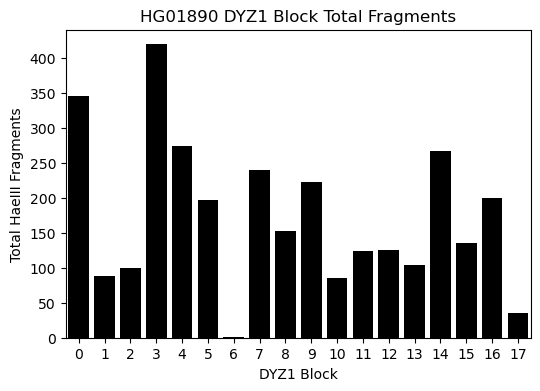

In [21]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
barplotList = []
for key in SpacerBlocks.keys():
    if int(key) < 18:
        barplotList.append([key, len(desired_df[desired_df['SpacerBlock']==int(key)])])
barplotDF = pd.DataFrame(data=barplotList, columns=['SpacerBlock','Total Fragments'])
sns.barplot(data=barplotDF, x='SpacerBlock', y='Total Fragments', color='black')
plt.title("HG01890 DYZ1 Block Total Fragments")
plt.xlabel("DYZ1 Block")
plt.ylabel("Total HaeIII Fragments")
#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01890_HaeIII_TotalFragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [24]:
print("Mean: "+str(np.mean(desired_df[desired_df['SpacerBlock']<18]['Length'])))
print("Median: "+str(np.median(desired_df[desired_df['SpacerBlock']<18]['Length'])))

Mean: 3628.4779955027307
Median: 3554.0


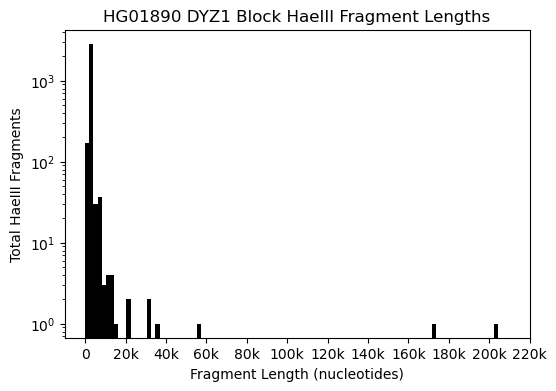

In [20]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 6,4
plt.hist(desired_df[desired_df['SpacerBlock']<18]['Length'], log=True, bins=100, color='black')
plt.title("HG01890 DYZ1 Block HaeIII Fragment Lengths")
plt.xlabel("Fragment Length (nucleotides)")
plt.ylabel("Total HaeIII Fragments")
x = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000]
labels = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k', '180k', '200k', '220k']
  
plt.xticks(x, labels, rotation ='horizontal')

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01890_HaeIII_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Import Repeatmasker and Visualize

In [26]:
desired_df['Coordinates']='temp'
for row in desired_df.index:
    desired_df.at[row,'Coordinates']='HG01890:'+str(desired_df.at[row,'Start'])+"-"+str(desired_df.at[row,'End'])

In [27]:
desired_df2 = desired_df.set_index("Coordinates").copy()
desired_df2

,SpacerBlock,Length,Start,End
Coordinates,,,,
HG01890:28322352-28526651,0,204300,28322352,28526651
HG01890:28526652-28528658,0,2007,28526652,28528658
HG01890:28528659-28535968,0,7310,28528659,28535968
HG01890:28535969-28567082,0,31114,28535969,28567082
HG01890:28567083-28570183,0,3101,28567083,28570183
...,...,...,...,...
HG01890:46028273-46031221,17,2949,46028273,46031221
HG01890:46031222-46034725,17,3504,46031222,46034725
HG01890:46034726-46038269,17,3544,46034726,46038269


In [28]:
sampleDict = {x:'+' for x in desired_df2.index}

In [29]:
spaceBlockDict = {x:{} for x in spacerDictionary.values()}
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_digestion_cleaned.fasta.out') as f:
    Lines = f.readlines()
    
    for line in tqdm(Lines):
        
        goodLine = ' '.join(line.split())
        if 'HSATII' in goodLine:
            #print(goodLine)
            sampleDict[str(goodLine.split(" ")[4])]=str(goodLine.split(" ")[8])
        else:
            continue
        
    f.close()

100%|█████████████████████████████████| 33062/33062 [00:00<00:00, 353464.06it/s]


In [30]:
sampleDict

{'HG01890:28322352-28526651': 'C',
 'HG01890:28526652-28528658': 'C',
 'HG01890:28528659-28535968': 'C',
 'HG01890:28535969-28567082': 'C',
 'HG01890:28567083-28570183': 'C',
 'HG01890:28570184-28573279': 'C',
 'HG01890:28573280-28745659': 'C',
 'HG01890:28745660-28753266': 'C',
 'HG01890:28753267-28756799': 'C',
 'HG01890:28756800-28760378': 'C',
 'HG01890:28760379-28763952': 'C',
 'HG01890:28763953-28767526': 'C',
 'HG01890:28767527-28771100': 'C',
 'HG01890:28771101-28774674': 'C',
 'HG01890:28774675-28778199': 'C',
 'HG01890:28778200-28781728': 'C',
 'HG01890:28781729-28785262': 'C',
 'HG01890:28785263-28788836': 'C',
 'HG01890:28788837-28790251': 'C',
 'HG01890:28790252-28792410': 'C',
 'HG01890:28792411-28795984': 'C',
 'HG01890:28795985-28797399': 'C',
 'HG01890:28797400-28799558': 'C',
 'HG01890:28799559-28802872': 'C',
 'HG01890:28802873-28803132': 'C',
 'HG01890:28803133-28804547': 'C',
 'HG01890:28804548-28806446': 'C',
 'HG01890:28806447-28806706': 'C',
 'HG01890:28806707-2

In [31]:
desired_df2['Orientation']=[x for x in sampleDict.values()]
desired_df2

,SpacerBlock,Length,Start,End,Orientation
Coordinates,,,,,
HG01890:28322352-28526651,0,204300,28322352,28526651,C
HG01890:28526652-28528658,0,2007,28526652,28528658,C
HG01890:28528659-28535968,0,7310,28528659,28535968,C
HG01890:28535969-28567082,0,31114,28535969,28567082,C
HG01890:28567083-28570183,0,3101,28567083,28570183,C
...,...,...,...,...,...
HG01890:46028273-46031221,17,2949,46028273,46031221,C
HG01890:46031222-46034725,17,3504,46031222,46034725,C
HG01890:46034726-46038269,17,3544,46034726,46038269,C


In [32]:
#desired_df2 = desired_df[desired_df['SpacerBlock']<23].copy()
#desired_df2['Orientation']='temp'
desired_df2['Color']='black'

In [33]:
for row in desired_df2.index:
    if desired_df2.at[row,'Orientation'] == '+':
        desired_df2.at[row,'Color']='blue'
    elif desired_df2.at[row,'Orientation'] == 'C':
        desired_df2.at[row,'Color']='red'
    else:
        continue

In [34]:
desired_df2

,SpacerBlock,Length,Start,End,Orientation,Color
Coordinates,,,,,,
HG01890:28322352-28526651,0,204300,28322352,28526651,C,red
HG01890:28526652-28528658,0,2007,28526652,28528658,C,red
HG01890:28528659-28535968,0,7310,28528659,28535968,C,red
HG01890:28535969-28567082,0,31114,28535969,28567082,C,red
HG01890:28567083-28570183,0,3101,28567083,28570183,C,red
...,...,...,...,...,...,...
HG01890:46028273-46031221,17,2949,46028273,46031221,C,red
HG01890:46031222-46034725,17,3504,46031222,46034725,C,red
HG01890:46034726-46038269,17,3544,46034726,46038269,C,red


In [35]:
print(collections.Counter(desired_df2['Orientation']))
print(collections.Counter(desired_df2['Color']))

Counter({'C': 2879, '+': 234})
Counter({'red': 2879, 'blue': 234})


In [36]:
#####################################################################################

In [37]:
rb_df = desired_df2.copy()

# Clusters

In [38]:
import pysam
from Bio.Seq import Seq

In [52]:
def split(word):
    return [char for char in word]

tempList = {}

#All Rows
for row in rb_df.index:
    
#Comment this out for all fragments
#for row in rb_df[(rb_df['Color']!='')].index:
    
# 2nd Pass BlueRows
#for row in rb_df.loc[BlackRows].index:
    
    
    tempDict = {}
    
    sequence = (pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])))

    if rb_df.at[row,'Color'] == 'blue':
        
        
        mySeq1 = sequence.split("HG01890:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()
        seq = Seq(mySeq1)
        mySeq = split(seq.reverse_complement())
        
    else:
        #print(split(sequence.split("chrY:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))))
        mySeq = (split(sequence.split("HG01890:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End']))[1].strip()))
    
    goodSeq = []
    for x in mySeq:
        if str(x) != '\n':
            goodSeq.append(str(x))
        else:
            continue

    
    i=0
    while i < len(goodSeq):
        
        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
            else:
                tempDict[str(''.join(goodSeq[i:i+5]))]=1

        i+=1
        
    tempList["HG01890:"+str(desired_df2.at[row,'Start'])+"-"+str(desired_df2.at[row,'End'])]=tempDict


In [53]:
allKeys = []
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in allKeys:
            continue
        else:
            allKeys.append(kmer)
            
kmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=[x for x in set(allKeys)]).fillna(0)
kmerDF

,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,GGGCT,TACTA,CGTCT,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG
HG01890:28322352-28526651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:28526652-28528658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:28528659-28535968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:28535969-28567082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:28567083-28570183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01890:46028273-46031221,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:46031222-46034725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:46034726-46038269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HG01890:46038270-46041798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
kmerDF['AGGCC'] = 0
kmerDF['GGCCT'] = 0

/tmp/ipykernel_12162/1239353834.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmerDF['AGGCC'] = 0
/tmp/ipykernel_12162/1239353834.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmerDF['GGCCT'] = 0


In [55]:
for key in tqdm(tempList.keys()):
    for kmer in tempList[key]:
        kmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
kmerDF

100%|██████████████████████████████████████| 3113/3113 [00:07<00:00, 430.78it/s]


,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,CGTCT,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG,AGGCC,GGCCT
HG01890:28322352-28526651,0,1,72,224,0,0,0,86,0,0,...,0,314,70,383,1404,67,0,154,0,0
HG01890:28526652-28528658,0,0,0,3,0,0,1,1,0,0,...,0,3,0,2,14,0,0,1,0,0
HG01890:28528659-28535968,0,3,3,9,0,0,2,5,0,0,...,0,9,0,11,47,3,0,6,0,0
HG01890:28535969-28567082,1,9,11,37,0,0,10,19,0,0,...,0,50,1,44,202,11,0,24,0,0
HG01890:28567083-28570183,0,1,1,4,0,0,3,2,0,0,...,0,4,0,4,21,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01890:46028273-46031221,0,1,3,1,0,0,0,4,0,0,...,0,14,1,3,39,0,0,0,0,0
HG01890:46031222-46034725,1,1,3,2,0,0,0,4,0,0,...,0,20,2,4,46,0,0,0,0,0
HG01890:46034726-46038269,1,1,3,2,0,0,0,6,0,0,...,0,21,1,3,46,0,0,0,0,0
HG01890:46038270-46041798,1,1,3,1,0,0,0,5,0,0,...,0,19,2,2,45,0,0,0,0,0


In [56]:
#kmerDF.to_csv('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HC02666/Kmer_DF.csv')

In [57]:
def prevalenceFilter(df):
    dfo = df.copy()
    dfo2 = dfo.div(dfo.sum(axis=1), axis=0).copy()            
    return(dfo2)

In [58]:
import composition_stats as cs

In [66]:
def clrTransformation(df):
    #CLR Transform the relative abundnace dataframe
    df2 = df.copy()

    for row in df.index:
        df2.loc[row] = cs.clr(np.array(df.loc[row].replace(0.0, 1e-10)))
    
    return(df2)

In [67]:
abundanceKmer = prevalenceFilter(kmerDF)
abundanceKmer

,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,CGTCT,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG,AGGCC,GGCCT
HG01890:28322352-28526651,0.000000,0.000005,0.000352,0.001096,0.0,0.0,0.000000,0.000421,0.0,0.0,...,0.0,0.001537,0.000343,0.001875,0.006872,0.000328,0.0,0.000754,0.0,0.0
HG01890:28526652-28528658,0.000000,0.000000,0.000000,0.001498,0.0,0.0,0.000499,0.000499,0.0,0.0,...,0.0,0.001498,0.000000,0.000999,0.006990,0.000000,0.0,0.000499,0.0,0.0
HG01890:28528659-28535968,0.000000,0.000411,0.000411,0.001232,0.0,0.0,0.000274,0.000684,0.0,0.0,...,0.0,0.001232,0.000000,0.001506,0.006433,0.000411,0.0,0.000821,0.0,0.0
HG01890:28535969-28567082,0.000032,0.000289,0.000354,0.001189,0.0,0.0,0.000321,0.000611,0.0,0.0,...,0.0,0.001607,0.000032,0.001414,0.006493,0.000354,0.0,0.000771,0.0,0.0
HG01890:28567083-28570183,0.000000,0.000323,0.000323,0.001292,0.0,0.0,0.000969,0.000646,0.0,0.0,...,0.0,0.001292,0.000000,0.001292,0.006781,0.000323,0.0,0.000646,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01890:46028273-46031221,0.000000,0.000340,0.001019,0.000340,0.0,0.0,0.000000,0.001358,0.0,0.0,...,0.0,0.004754,0.000340,0.001019,0.013243,0.000000,0.0,0.000000,0.0,0.0
HG01890:46031222-46034725,0.000286,0.000286,0.000857,0.000571,0.0,0.0,0.000000,0.001143,0.0,0.0,...,0.0,0.005714,0.000571,0.001143,0.013143,0.000000,0.0,0.000000,0.0,0.0
HG01890:46034726-46038269,0.000282,0.000282,0.000847,0.000565,0.0,0.0,0.000000,0.001695,0.0,0.0,...,0.0,0.005932,0.000282,0.000847,0.012994,0.000000,0.0,0.000000,0.0,0.0
HG01890:46038270-46041798,0.000284,0.000284,0.000851,0.000284,0.0,0.0,0.000000,0.001418,0.0,0.0,...,0.0,0.005390,0.000567,0.000567,0.012766,0.000000,0.0,0.000000,0.0,0.0


In [68]:
CLR_KMER = clrTransformation(abundanceKmer)

In [69]:
CLR_KMER.index.name ='SampleName'

In [70]:
for row in rb_df.index:
    if 'HG01890:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']) in CLR_KMER.index:
        CLR_KMER.at['HG01890:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End']), 'Color'] = str(rb_df.at[row,'Color'])
CLR_KMER

,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG,AGGCC,GGCCT,Color
SampleName,,,,,,,,,,,,,,,,,,,,,
HG01890:28322352-28526651,-10.093087,0.705439,4.982105,6.117085,-10.093087,-10.093087,-10.093087,5.159786,-10.093087,-10.093087,...,6.454832,4.953934,6.653474,7.952519,4.910131,-10.093087,5.742391,-10.093087,-10.093087,red
HG01890:28526652-28528658,-5.790555,-5.790555,-5.790555,10.731507,-5.790555,-5.790555,9.632894,9.632894,-5.790555,-5.790555,...,10.731507,-5.790555,10.326041,12.271952,-5.790555,-5.790555,9.632894,-5.790555,-5.790555,red
HG01890:28528659-28535968,-7.601147,7.626865,7.626865,8.725477,-7.601147,-7.601147,7.221400,8.137691,-7.601147,-7.601147,...,8.725477,-7.601147,8.926148,10.378400,7.626865,-7.601147,8.320012,-7.601147,-7.601147,red
HG01890:28535969-28567082,3.595809,5.793034,5.993704,7.206727,-9.084757,-9.084757,5.898394,6.540248,-9.084757,-9.084757,...,7.507832,3.595809,7.379999,8.904077,5.993704,-9.084757,6.773863,-9.084757,-9.084757,red
HG01890:28567083-28570183,-7.173307,7.814354,7.814354,9.200649,-7.173307,-7.173307,8.912967,8.507502,-7.173307,-7.173307,...,9.200649,-7.173307,9.200649,10.858877,7.814354,-7.173307,8.507502,-7.173307,-7.173307,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HG01890:46028273-46031221,-6.898736,8.139250,9.237863,8.139250,-6.898736,-6.898736,-6.898736,9.525545,-6.898736,-6.898736,...,10.778308,8.139250,9.237863,11.802812,-6.898736,-6.898736,-6.898736,-6.898736,-6.898736,red
HG01890:46031222-46034725,7.543311,7.543311,8.641923,8.236458,-7.322022,-7.322022,-7.322022,8.929605,-7.322022,-7.322022,...,10.539043,8.236458,8.929605,11.371952,-7.322022,-7.322022,-7.322022,-7.322022,-7.322022,red
HG01890:46034726-46038269,7.560973,7.560973,8.659586,8.254121,-7.292996,-7.292996,-7.292996,9.352733,-7.292996,-7.292996,...,10.605496,7.560973,8.659586,11.389615,-7.292996,-7.292996,-7.292996,-7.292996,-7.292996,red


In [71]:
set(CLR_KMER['Color'])

{'blue', 'red'}

In [72]:
##################### Bray-Curtis distance ##################

In [73]:
from scipy.spatial import distance

In [74]:
fragmentList = [x for x in kmerDF.index]
fragmentList

['HG01890:28322352-28526651',
 'HG01890:28526652-28528658',
 'HG01890:28528659-28535968',
 'HG01890:28535969-28567082',
 'HG01890:28567083-28570183',
 'HG01890:28570184-28573279',
 'HG01890:28573280-28745659',
 'HG01890:28745660-28753266',
 'HG01890:28753267-28756799',
 'HG01890:28756800-28760378',
 'HG01890:28760379-28763952',
 'HG01890:28763953-28767526',
 'HG01890:28767527-28771100',
 'HG01890:28771101-28774674',
 'HG01890:28774675-28778199',
 'HG01890:28778200-28781728',
 'HG01890:28781729-28785262',
 'HG01890:28785263-28788836',
 'HG01890:28788837-28790251',
 'HG01890:28790252-28792410',
 'HG01890:28792411-28795984',
 'HG01890:28795985-28797399',
 'HG01890:28797400-28799558',
 'HG01890:28799559-28802872',
 'HG01890:28802873-28803132',
 'HG01890:28803133-28804547',
 'HG01890:28804548-28806446',
 'HG01890:28806447-28806706',
 'HG01890:28806707-28810020',
 'HG01890:28810021-28810280',
 'HG01890:28810281-28813594',
 'HG01890:28813595-28813854',
 'HG01890:28813855-28815269',
 'HG01890:

In [75]:
OrientationDict = {}
for row in rb_df.index:
    OrientationDict['HG01890:'+str(rb_df.at[row,'Start'])+'-'+str(rb_df.at[row,'End'])] = str(rb_df.at[row,'Orientation'])
OrientationDict

{'HG01890:28322352-28526651': 'C',
 'HG01890:28526652-28528658': 'C',
 'HG01890:28528659-28535968': 'C',
 'HG01890:28535969-28567082': 'C',
 'HG01890:28567083-28570183': 'C',
 'HG01890:28570184-28573279': 'C',
 'HG01890:28573280-28745659': 'C',
 'HG01890:28745660-28753266': 'C',
 'HG01890:28753267-28756799': 'C',
 'HG01890:28756800-28760378': 'C',
 'HG01890:28760379-28763952': 'C',
 'HG01890:28763953-28767526': 'C',
 'HG01890:28767527-28771100': 'C',
 'HG01890:28771101-28774674': 'C',
 'HG01890:28774675-28778199': 'C',
 'HG01890:28778200-28781728': 'C',
 'HG01890:28781729-28785262': 'C',
 'HG01890:28785263-28788836': 'C',
 'HG01890:28788837-28790251': 'C',
 'HG01890:28790252-28792410': 'C',
 'HG01890:28792411-28795984': 'C',
 'HG01890:28795985-28797399': 'C',
 'HG01890:28797400-28799558': 'C',
 'HG01890:28799559-28802872': 'C',
 'HG01890:28802873-28803132': 'C',
 'HG01890:28803133-28804547': 'C',
 'HG01890:28804548-28806446': 'C',
 'HG01890:28806447-28806706': 'C',
 'HG01890:28806707-2

In [76]:
#All Rows

def split(word):
    return [char for char in word]

tempList = {}

for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/centReferences/references/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/centReferences/references/'+name, 'r')
        Lines = file1.readlines()

        tempDict = {}


        for line in tqdm(Lines): 
            
            if '>' in line:
                continue
            else:
                
                if 'DYZ1_' in name:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq.reverse_complement())
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue

                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        
                else:
                    
                    seq = Seq(line.strip())
                    mySeq = split(seq)
                    print(mySeq)
                    
                    goodSeq = []
                    for x in mySeq:
                        if str(x) != 'n':
                            goodSeq.append(str(x))
                        else:
                            continue
                            
                    i=0
                    while i < len(goodSeq):

                        if len(str(''.join(goodSeq[i:i+5])).strip()) > 4:
                            if str(''.join(goodSeq[i:i+5])) in tempDict.keys():
                                tempDict[str(''.join(goodSeq[i:i+5]))]+=1
                            else:
                                tempDict[str(''.join(goodSeq[i:i+5]))]=1

                        i+=1
                        

       
        tempList[name.split(".")[0]]=tempDict
        
    
            
ConkmerDF = pd.DataFrame(index=[x for x in tempList.keys()], columns=abundanceKmer.columns).fillna(0)
for key in tempList.keys():
    for kmer in tempList[key]:
        if kmer in ConkmerDF.columns:
            ConkmerDF.at[str(key),str(kmer)]= int(tempList[key][kmer])
        else:
            continue
        
ConkmerDF.fillna(0, inplace=True)
abundanceConsensus = prevalenceFilter(ConkmerDF)
abundanceConsensus

Yqhet_3k1bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 458.32it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 387.50it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 344.05it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 431.27it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 418.28it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'G', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'A', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 480.39it/s]


['T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 'T', 'G', 'A', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'C', 'T', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'C', 'T', 'G', 'C', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'A', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'C', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 419.66it/s]


Yqhet_2k7bp.fasta


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 525.37it/s]


['G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'G', 'C', 'A', 'G', 'G', 'C', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'A', 'A', 'G', 'G', 'C', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'A', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'A', 'G', 'G', 'G', 'T', 'G', 'G', 'A', 'T', 'T', 'G', 'T', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'T', 'T', 'G', 'G', 'A', 'A', 'A', 'A', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'C', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'A', 'T', 'T', 'G', 'A', 'G', 'T', 'G', 'A', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'G', 'T', 'G', 'G', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'A', 'G', 'T', 'A', 'A', 'T', 'G', 'G', 'A', 'G', 'T',

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 422.90it/s]


,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,CGTCT,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG,AGGCC,GGCCT
Yqhet_3k1bp,0.000000,0.000321,0.000321,0.001284,0.0,0.0,0.000321,0.000642,0.0,0.0,...,0.0,0.001284,0.000000,0.001284,0.006742,0.000321,0.0,0.000642,0.0,0.0
DYZ18_Yq,0.000000,0.000000,0.000350,0.001399,0.0,0.0,0.000000,0.000699,0.0,0.0,...,0.0,0.001049,0.000350,0.001748,0.006993,0.000350,0.0,0.001049,0.0,0.0
DYZ1_Yq,0.000281,0.000561,0.000842,0.000561,0.0,0.0,0.000000,0.001122,0.0,0.0,...,0.0,0.004769,0.000281,0.000842,0.014025,0.000000,0.0,0.000000,0.0,0.0
Yqhet_2k7bp,0.000362,0.000000,0.000725,0.000725,0.0,0.0,0.000000,0.000362,0.0,0.0,...,0.0,0.002536,0.000725,0.000725,0.012681,0.000000,0.0,0.000362,0.0,0.0


In [77]:
ConkmerDF

,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,CGTCT,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG,AGGCC,GGCCT
Yqhet_3k1bp,0,1,1,4,0,0,1,2,0,0,...,0,4,0,4,21,1,0,2,0,0
DYZ18_Yq,0,0,1,4,0,0,0,2,0,0,...,0,3,1,5,20,1,0,3,0,0
DYZ1_Yq,1,2,3,2,0,0,0,4,0,0,...,0,17,1,3,50,0,0,0,0,0
Yqhet_2k7bp,1,0,2,2,0,0,0,1,0,0,...,0,7,2,2,35,0,0,1,0,0


In [78]:
for column in abundanceConsensus.columns:
    if column in abundanceKmer.columns:
        continue
    else:
        print(column)

In [79]:
for con in tempList.keys():
    print(con)
    print(tempList[con].values())

Yqhet_3k1bp
dict_values([113, 118, 113, 123, 147, 142, 140, 147, 137, 10, 2, 1, 4, 3, 1, 4, 5, 5, 9, 21, 26, 27, 29, 18, 14, 12, 4, 1, 4, 3, 3, 111, 5, 1, 5, 7, 8, 8, 5, 5, 2, 4, 4, 9, 12, 20, 24, 18, 2, 1, 7, 6, 7, 5, 2, 13, 12, 2, 2, 2, 19, 18, 12, 8, 5, 6, 2, 11, 5, 11, 12, 9, 10, 10, 7, 7, 6, 4, 2, 2, 6, 10, 8, 7, 8, 9, 9, 5, 1, 1, 2, 2, 11, 10, 12, 11, 10, 2, 3, 4, 1, 1, 3, 3, 4, 3, 1, 12, 10, 1, 3, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 10, 9, 8, 7, 4, 2, 3, 4, 2, 2, 26, 7, 6, 3, 3, 5, 40, 19, 18, 20, 18, 11, 28, 25, 29, 21, 37, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 3, 13, 7, 5, 18, 20, 22, 8, 2, 2, 3, 1, 1, 2, 1, 1, 7, 2, 1, 3, 4, 3, 3, 1, 1, 1, 1, 2, 2, 7, 7, 4, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 8, 1, 5, 5, 12, 5, 5, 8, 5, 3, 3, 3, 2, 2, 1, 1, 1, 7, 9, 3, 3, 6, 2, 3, 1, 1, 6, 4, 2, 2, 2, 2, 3, 2, 2, 5, 4, 1, 2, 4, 3, 3, 2, 5, 1, 1, 3, 1, 4, 4, 2, 2, 1, 2, 4, 10, 1, 1, 1, 4, 4, 3, 9, 2, 1, 1, 1, 2, 3, 2, 2, 4, 4, 4, 3, 1, 1, 1, 4, 3, 3, 3, 4, 2, 1, 5, 1, 3, 1, 1, 5, 3, 1, 4, 5, 2, 1, 

In [80]:
ConkmerDF[[x for x in ConkmerDF.max().sort_values(ascending=False).index]]

,AATGG,ATGGA,GAATG,GGAAT,TGGAA,GTGGA,GAGTG,AGTGG,GGAGT,TGGAG,...,CTGCG,CAACG,TTATT,TTAAC,CATCC,CCTCG,CGTTA,GCACC,TACCA,GGCCT
Yqhet_3k1bp,147,137,140,142,147,123,118,113,113,111,...,0,0,0,0,0,0,0,0,0,0
DYZ18_Yq,133,126,126,131,136,114,112,105,109,106,...,0,0,0,0,0,0,0,0,0,0
DYZ1_Yq,252,248,247,244,237,8,13,8,14,14,...,0,0,0,0,0,0,0,0,0,0
Yqhet_2k7bp,183,180,179,173,176,30,31,27,29,33,...,0,0,0,0,0,0,0,0,0,0


In [81]:
abundanceConsensus

,ATAGC,TATGC,ACTAG,AAGGC,ACGTT,TCTCT,TTGTG,GACAG,CACCT,GACGC,...,CGTCT,CGGAA,ATGTT,TGGTA,CGAAT,AAGAT,TGCTT,GTGAG,AGGCC,GGCCT
Yqhet_3k1bp,0.000000,0.000321,0.000321,0.001284,0.0,0.0,0.000321,0.000642,0.0,0.0,...,0.0,0.001284,0.000000,0.001284,0.006742,0.000321,0.0,0.000642,0.0,0.0
DYZ18_Yq,0.000000,0.000000,0.000350,0.001399,0.0,0.0,0.000000,0.000699,0.0,0.0,...,0.0,0.001049,0.000350,0.001748,0.006993,0.000350,0.0,0.001049,0.0,0.0
DYZ1_Yq,0.000281,0.000561,0.000842,0.000561,0.0,0.0,0.000000,0.001122,0.0,0.0,...,0.0,0.004769,0.000281,0.000842,0.014025,0.000000,0.0,0.000000,0.0,0.0
Yqhet_2k7bp,0.000362,0.000000,0.000725,0.000725,0.0,0.0,0.000000,0.000362,0.0,0.0,...,0.0,0.002536,0.000725,0.000725,0.012681,0.000000,0.0,0.000362,0.0,0.0


In [82]:
#Compare to Consensus Sequence Code
fragmentList = [x for x in kmerDF.index]
myDict = {}
for x in fragmentList:
    myDict[x] = {}
    for y in abundanceConsensus.index:
        myDict[x][y] = 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceConsensus.loc[y])))
    

In [83]:
print(len(kmerDF))

3113


In [84]:
myDict
myGoodDict = myDict.copy()

In [85]:
myGoodDict

{'HG01890:28322352-28526651': {'Yqhet_3k1bp': 0.9070916394812147,
  'DYZ18_Yq': 0.9484345147353723,
  'DYZ1_Yq': 0.6119195556034225,
  'Yqhet_2k7bp': 0.6737586355234491},
 'HG01890:28526652-28528658': {'Yqhet_3k1bp': 0.8828094936247315,
  'DYZ18_Yq': 0.8454103809320983,
  'DYZ1_Yq': 0.6469947253033493,
  'Yqhet_2k7bp': 0.7042411021149435},
 'HG01890:28528659-28535968': {'Yqhet_3k1bp': 0.9521152604842477,
  'DYZ18_Yq': 0.8995470721449369,
  'DYZ1_Yq': 0.605680435569681,
  'Yqhet_2k7bp': 0.6650978746870747},
 'HG01890:28535969-28567082': {'Yqhet_3k1bp': 0.9650826843907576,
  'DYZ18_Yq': 0.8996610268548552,
  'DYZ1_Yq': 0.6168884963683585,
  'Yqhet_2k7bp': 0.6766320070437298},
 'HG01890:28567083-28570183': {'Yqhet_3k1bp': 0.9624070516126257,
  'DYZ18_Yq': 0.9010830467562789,
  'DYZ1_Yq': 0.6124878575429962,
  'Yqhet_2k7bp': 0.6724829545188659},
 'HG01890:28570184-28573279': {'Yqhet_3k1bp': 0.9619487145411241,
  'DYZ18_Yq': 0.9058852531685649,
  'DYZ1_Yq': 0.6118697484709217,
  'Yqhet_2k7b

In [211]:
myGoodDict['HG01890:45822762-45844084']

{'Yqhet_3k1bp': 0.10430418852594348,
 'DYZ18_Yq': 0.09807094495635216,
 'DYZ1_Yq': 0.11506433988421527,
 'Yqhet_2k7bp': 0.11420363273966005}

In [90]:
#import json
#with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/HG01890_kmerDict.json', 'w') as fp:
#    json.dump(myGoodDict, fp)

In [86]:
#Compare Fragments to Fragments
CutoffDict = {'0.1':0, '0.15':0, '0.2':0, '0.25':0, '0.3':0, '0.35':0, '0.4':0, '0.45':0, '0.5':0, '0.55':0, '0.6':0,'0.65':0, '0.7':0, '0.75':0, '0.8':0, '0.85':0, '0.9':0, '0.95':0}

for i in CutoffDict.keys():
    
    myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

    for x in myDict.keys():

        currentLeader = float(i)
        currentName = 'Other'

        for consensus in myDict[x].keys():

            if float(myDict[x][consensus]) > currentLeader:
                currentLeader = float(myDict[x][consensus])
                currentName = consensus
            else:
                continue

        myCons[currentName].append(x)

    CutoffDict[str(i)] = len(myCons['Other'])
    

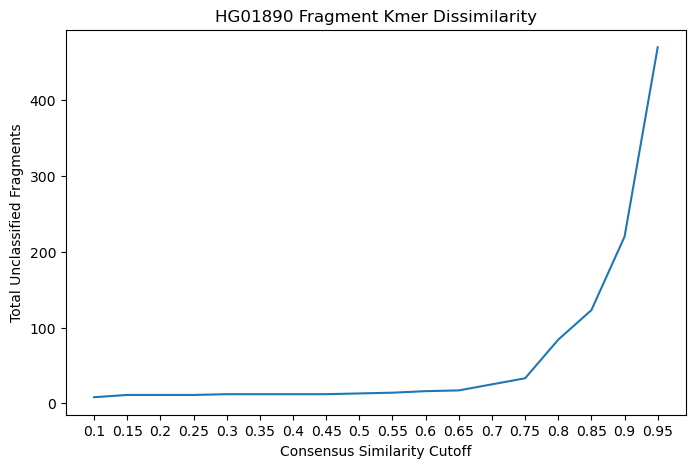

In [88]:
from matplotlib import rcParams
plt.rcParams.update(plt.rcParamsDefault)
rcParams['figure.figsize'] = 8,5
cutOffList = [[x,y] for x,y in CutoffDict.items()]
cutoffDF = pd.DataFrame(data=cutOffList, columns=['Similarity', 'Unknowns'])

sns.lineplot(data=cutoffDF, x='Similarity', y='Unknowns')

plt.title("HG01890 Fragment Kmer Dissimilarity")
plt.xlabel("Consensus Similarity Cutoff")
plt.ylabel("Total Unclassified Fragments")

#plt.savefig("/home/mark/Desktop/chromosome_y/Images/DYZ1/HaeIII_Fragments/HG01890_kmer_Fragments.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [91]:
#Compare Fragments to Fragments

myCons = {'Yqhet_3k1bp':[], 'DYZ18_Yq':[], 'DYZ1_Yq':[], 'Yqhet_2k7bp':[], 'Other':[]}

for x in myDict.keys():
    
    
    currentLeader = 0.75
    currentName = 'Other'
    
    for consensus in myDict[x].keys():
    
        if float(myDict[x][consensus]) > currentLeader:
            currentLeader = float(myDict[x][consensus])
            currentName = consensus
        else:
            continue
            
    myCons[currentName].append(x)


for cons in myCons.keys():
    
    fragmentList = [x for x in myCons[cons]]

    Run = 0
    while len(fragmentList) > 0:

        currentTarget = fragmentList.pop(0)

        myDict = {}
        for x in fragmentList:
            myDict[x]= 1-float(distance.braycurtis(list(abundanceKmer.loc[x]), list(abundanceKmer.loc[currentTarget])))

        tempList = []
        tempList.append(currentTarget)

        for x,y in myDict.items():
            if y > .75:
                tempList.append(x)
                fragmentList.remove(x)
            else:
                continue

        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01890/myConBins/'+str(cons)+"_"+str(Run)+'.fasta', 'a+') as file:
            for row in tempList:
                if OrientationDict[row] == 'C':
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(row.split("HG01890:")[1])))
                else:
                    file.write(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(row.split("HG01890:")[1]))).split("\n")[0]+'\n')
                    string = Seq(''.join(str(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+str(row.split("HG01890:")[1]))).split("\n")[1:]))
                    file.write(str(string.reverse_complement())+'\n')
        file.close()

        Run+=1
    

In [92]:
rb_df['Identity'] = 'temp'
for row in rb_df.index:
    rb_df.at[row,'Identity'] = 'HG01890:'+str(rb_df.at[row,'Start'])+"-"+str(rb_df.at[row,'End'])
rb_df.set_index("Identity", inplace=True)
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01890:28322352-28526651,0,204300,28322352,28526651,C,red
HG01890:28526652-28528658,0,2007,28526652,28528658,C,red
HG01890:28528659-28535968,0,7310,28528659,28535968,C,red
HG01890:28535969-28567082,0,31114,28535969,28567082,C,red
HG01890:28567083-28570183,0,3101,28567083,28570183,C,red
...,...,...,...,...,...,...
HG01890:46028273-46031221,17,2949,46028273,46031221,C,red
HG01890:46031222-46034725,17,3504,46031222,46034725,C,red
HG01890:46034726-46038269,17,3544,46034726,46038269,C,red


In [93]:
rb_df['Color'] = 'temp'
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01890/myConBins/"):
    for name in filenames:
        print(name)
        
        file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Kmeans/HG01890/myConBins/'+name, 'r')
        Lines = file1.readlines()

        for line in tqdm(Lines): 
            if '>' in line:
                if 'Other' in name:
                    rb_df.at[str(line.split("utig4-384.")[1].strip()), 'Color'] = 'lime'
                elif 'DYZ1_Yq' in name:
                    rb_df.at[str(line.split("utig4-384.")[1].strip()), 'Color'] = 'black'
                    
                elif 'DYZ18_Yq' in name:
                    rb_df.at[str(line.split("utig4-384.")[1].strip()), 'Color'] = 'grey'
                    
                elif 'Yqhet_2k7bp' in name:
                    rb_df.at[str(line.split("utig4-384.")[1].strip()), 'Color'] = 'cyan'
                    
                elif 'Yqhet_3k1bp' in name:
                    rb_df.at[str(line.split("utig4-384.")[1].strip()), 'Color'] = 'red'
                    
                else:
                    print("IDK")
    
            else:
                continue

Other_4.fasta


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 126639.61it/s]


Other_2.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 17962.76it/s]


Other_0.fasta


100%|███████████████████████████████████████| 66/66 [00:00<00:00, 156133.14it/s]


Other_9.fasta


100%|████████████████████████████████████████| 11/11 [00:00<00:00, 53585.77it/s]


Other_11.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 67923.95it/s]


Other_1.fasta


100%|███████████████████████████████████████| 30/30 [00:00<00:00, 285326.80it/s]


Other_8.fasta


100%|███████████████████████████████████████| 12/12 [00:00<00:00, 125515.33it/s]


Other_3.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 41943.04it/s]


Yqhet_3k1bp_0.fasta


100%|█████████████████████████████████████| 784/784 [00:00<00:00, 748880.51it/s]


DYZ18_Yq_0.fasta


100%|███████████████████████████████████| 3406/3406 [00:00<00:00, 783341.53it/s]


Other_6.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 36314.32it/s]


Yqhet_2k7bp_0.fasta


100%|███████████████████████████████████| 3002/3002 [00:00<00:00, 768043.22it/s]


Other_10.fasta


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 58867.42it/s]


DYZ1_Yq_0.fasta


100%|██████████████████████████████| 171061/171061 [00:00<00:00, 1029518.64it/s]


Other_7.fasta


100%|██████████████████████████████████████████| 8/8 [00:00<00:00, 70640.91it/s]


DYZ1_Yq_1.fasta


100%|████████████████████████████████████████| 22/22 [00:00<00:00, 79205.74it/s]


Other_5.fasta


100%|██████████████████████████████████████████| 2/2 [00:00<00:00, 42153.81it/s]


In [191]:
rb_df

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
0,21,HG01890:28322352-28526651,C,2850,28322354,28325204,grey,0
1,36,HG01890:28322352-28526651,C,2827,28325206,28328033,grey,0
2,64,HG01890:28322352-28526651,C,2861,28328035,28330896,grey,0
3,47,HG01890:28322352-28526651,C,2846,28330898,28333744,grey,0
4,3,HG01890:28322352-28526651,C,2862,28333746,28336608,grey,0
...,...,...,...,...,...,...,...,...
3330,2821,HG01890:46028273-46031221,+,2947,46028275,46031222,black,17
3331,2703,HG01890:46031222-46034725,+,3503,46031223,46034726,black,17
3332,2688,HG01890:46034726-46038269,+,3543,46034727,46038270,black,17
3333,2698,HG01890:46038270-46041798,+,3528,46038271,46041799,black,17


In [95]:
for color in set(rb_df['Color']):
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/'+str(color)+".fasta", 'a+') as file:
        for row in rb_df[rb_df['Color']==color].index:
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384."+str(row)))
    file.close()
        

In [96]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/black.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/DYZ1.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-384.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████| 184826/184826 [00:00<00:00, 896111.77it/s]


In [97]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/grey.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/DYZ18.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-384.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 3406/3406 [00:00<00:00, 513157.78it/s]


In [98]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/cyan.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/2kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-384.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|███████████████████████████████████| 3002/3002 [00:00<00:00, 611376.58it/s]


In [99]:
with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/red.fasta', 'r') as file:
    with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/3kbp.fasta', 'a+') as file2:
        Lines = file.readlines()
        for line in tqdm(Lines):
            if ">" in line:
                file2.write(">"+str(line.split("utig4-384.")[1]))
            else:
                file2.write(line)
    file2.close()
file.close()

100%|█████████████████████████████████████| 784/784 [00:00<00:00, 481102.32it/s]


In [100]:
#rb_df.to_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/DYZ1_dataframe.csv")

In [15]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/DYZ1_dataframe.csv").set_index("Identity")
rb_df

,SpacerBlock,Length,Start,End,Orientation,Color
Identity,,,,,,
HG01890:28322352-28526651,0,204300,28322352,28526651,C,grey
HG01890:28526652-28528658,0,2007,28526652,28528658,C,red
HG01890:28528659-28535968,0,7310,28528659,28535968,C,red
HG01890:28535969-28567082,0,31114,28535969,28567082,C,red
HG01890:28567083-28570183,0,3101,28567083,28570183,C,red
...,...,...,...,...,...,...
HG01890:46028273-46031221,17,2949,46028273,46031221,C,black
HG01890:46031222-46034725,17,3504,46031222,46034725,C,black
HG01890:46034726-46038269,17,3544,46034726,46038269,C,black


In [16]:
blockDefine = {x:{'Start':0, 'End':0} for x in set(rb_df['SpacerBlock'])}
for block in blockDefine.keys():
    blockDefine[block]['Start'] = int(rb_df[rb_df['SpacerBlock']==block].index[0].split("-")[0].split(":")[1])
    blockDefine[block]['End'] = int(rb_df[rb_df['SpacerBlock']==block].index[-1].split("-")[1])
blockDefine

{0: {'Start': 28322352, 'End': 29823871},
 1: {'Start': 29857043, 'End': 30203322},
 2: {'Start': 30295250, 'End': 30645332},
 3: {'Start': 30666370, 'End': 32095446},
 4: {'Start': 32326804, 'End': 33301785},
 5: {'Start': 33575580, 'End': 34296876},
 6: {'Start': 34358919, 'End': 34364640},
 7: {'Start': 34473439, 'End': 35308683},
 8: {'Start': 35545475, 'End': 36090560},
 9: {'Start': 36293833, 'End': 37078637},
 10: {'Start': 37730856, 'End': 38023000},
 11: {'Start': 38416460, 'End': 38847093},
 12: {'Start': 40825754, 'End': 41267031},
 13: {'Start': 41464377, 'End': 41795367},
 14: {'Start': 43443101, 'End': 44387310},
 15: {'Start': 44546474, 'End': 45030984},
 16: {'Start': 45138569, 'End': 45796966},
 17: {'Start': 45822762, 'End': 46041949}}

In [33]:
goodColors = ['cyan', 'red', 'grey']
for block in set(rb_df['SpacerBlock']):
    if str(block) == '0':
        
        for color in set(rb_df['Color']):
            if color in goodColors:
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/'+str(color)+"_block.fasta", 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    if color == 'red':
                        End = str(28632484)
                    else:
                        End =str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+Start+"-"+End))
                file.close()
                
            elif color == 'black':
                with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
                    Start= str(list(rb_df[(rb_df['SpacerBlock']==block) & (rb_df['Color']==color)].index)[0].split("-")[0].split(":")[1])
                    End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
                    file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+Start+"-"+End))
                file.close()
                
            else:
                continue
    else:
        with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/black_block.fasta', 'a+') as file:
            Start= str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[0].split("-")[0].split(":")[1])
            End =str(list(rb_df[(rb_df['SpacerBlock']==block)].index)[-1].split("-")[1])
            file.write(pysam.faidx('/home/mark/Desktop/chromosome_y/assemblies/assembly_pysam/HG01890.chrY.fasta', "chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:"+Start+"-"+End))
        file.close()

In [34]:
for (dirpath, dirnames, filenames) in walk("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/"):
    for name in filenames:
        print(name)
        
        if 'HMMER' in name or 'cleaned' in name:
            continue
        else:
        
            file1 = open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/'+name, 'r')
            Lines = file1.readlines()

            with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/'+name.split(".")[0]+'_cleaned.fasta', 'a+') as file2:
                for line in tqdm(Lines):
                    if ">" in line:
                        print(line)
                        file2.write(">"+str(line.split("utig4-384.")[1]))
                    else:
                        file2.write(line)
            file2.close()


            file1.close()


red_block.fasta


100%|███████████████████████████████████| 1765/1765 [00:00<00:00, 432946.17it/s]


>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:28526652-28632484

grey_block.fasta


100%|███████████████████████████████████| 3406/3406 [00:00<00:00, 481635.80it/s]


>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:28322352-28526651

black_block.fasta


 31%|█████████▊                      | 55586/181103 [00:00<00:00, 555823.42it/s]

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:28753267-29823871

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:29857043-30203322

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:30295250-30645332

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:30666370-32095446

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:32326804-33301785

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:33575580-34296876

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:34358919-34364640

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:34473439-35308683

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:35545475-36090560

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:36293833-37078637

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:37730856-38023000

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:38416460-38847093

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:40825754-41267031

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:41464377-41795367



 88%|███████████████████████████▎   | 159490/181103 [00:00<00:00, 840031.79it/s]

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:43443101-44387310

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:44546474-45030984



100%|███████████████████████████████| 181103/181103 [00:00<00:00, 864482.67it/s]


>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:45138569-45796966

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:45822762-46041949

cyan_block.fasta


100%|███████████████████████████████████| 3001/3001 [00:00<00:00, 595078.78it/s]

>chrY.01-24.01.PAR1-PAR2.RV.utig4-384.HG01890:28573280-28753266

red_block_cleaned.fasta
black_block_cleaned.fasta
runHMMER2.sh
DYZ18_hmmer.tsv


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/DYZ18_hmmer.tsv'

In [8]:
sizeDict = {'DYZ1_Yq': 3569, 'DYZ18_Yq': 2864, 'Yqhet_3k1bp':3120, 'Yqhet_2k7bp': 2767}

In [35]:
DYZ18Dict = {x:[] for x in set(rb_df[rb_df['Color']=='grey'].index)}
DYZ1Dict = {x:[] for x in set(rb_df[rb_df['Color']=='black'].index)}
k3bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='red'].index)}
k2bpDict = {x:[] for x in set(rb_df[rb_df['Color']=='cyan'].index)}

In [36]:
DYZ18_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/HMMER/DYZ18_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ18_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ18_hmmer2 = pd.DataFrame(data=DYZ18_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ18_hmmer = DYZ18_hmmer2[DYZ18_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ18_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
21,HG01890:28322352-28526651,4,2864,2,2852,C,0.0,2466.3,2850
36,HG01890:28322352-28526651,2,2864,2854,5681,C,0.0,2454.2,2827
64,HG01890:28322352-28526651,2,2864,5683,8544,C,0.0,2425.0,2861
47,HG01890:28322352-28526651,2,2864,8546,11392,C,0.0,2445.4,2846
3,HG01890:28322352-28526651,2,2864,11394,14256,C,0.0,2497.0,2862
...,...,...,...,...,...,...,...,...,...
23,HG01890:28322352-28526651,2,2864,189970,192866,C,0.0,2465.6,2896
67,HG01890:28322352-28526651,2,2864,192868,195739,C,0.0,2412.4,2871
55,HG01890:28322352-28526651,2,2864,195741,198617,C,0.0,2440.1,2876
6,HG01890:28322352-28526651,2,2864,198619,201490,C,0.0,2476.8,2871


In [37]:
DYZ1_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/HMMER/DYZ1_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), 'C', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                DYZ1_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), '+', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

DYZ1_hmmer2 = pd.DataFrame(data=DYZ1_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
DYZ1_hmmer = DYZ1_hmmer2[DYZ1_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
DYZ1_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
2496,HG01890:28753267-29823871,1,3569,1,3533,C,0.0,3050.4,3532
2913,HG01890:44546474-45030984,500,3569,2,3052,+,0.0,2686.1,3050
2799,HG01890:29857043-30203322,1,3567,159,3714,+,0.0,2908.5,3555
3058,HG01890:30295250-30645332,1,2114,897,2885,C,0.0,1621.5,1988
3082,HG01890:43443101-44387310,382,2116,898,2542,C,0.0,1335.6,1644
...,...,...,...,...,...,...,...,...,...
824,HG01890:30666370-32095446,1,3569,1411799,1415362,C,0.0,3125.0,3563
962,HG01890:30666370-32095446,1,3569,1415363,1418901,C,0.0,3120.8,3538
1464,HG01890:30666370-32095446,1,3569,1418902,1422435,C,0.0,3106.0,3533
782,HG01890:30666370-32095446,1,3569,1422436,1426004,C,0.0,3126.3,3568


In [38]:
k3_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/HMMER/Yq_3kbp_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            if info[8] == '-':
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k3_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k3_hmmer2 = pd.DataFrame(data=k3_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k3_hmmer = k3_hmmer2[k3_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k3_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
1,HG01890:28526652-28632484,26,3119,2,3099,C,0.0,2749.4,3097
9,HG01890:28526652-28632484,2,3119,3099,6220,C,0.0,2723.4,3121
18,HG01890:28526652-28632484,2,3119,6220,9295,C,0.0,2670.4,3075
13,HG01890:28526652-28632484,2,3119,9295,12420,C,0.0,2710.3,3125
17,HG01890:28526652-28632484,2,3118,12420,15500,C,0.0,2691.3,3080
6,HG01890:28526652-28632484,2,3119,15501,18602,C,0.0,2729.2,3101
3,HG01890:28526652-28632484,3,3119,18603,21733,C,0.0,2741.2,3130
11,HG01890:28526652-28632484,2,3119,21733,24847,C,0.0,2716.4,3114
14,HG01890:28526652-28632484,2,3119,24847,27947,C,0.0,2709.6,3100
10,HG01890:28526652-28632484,2,3119,27947,31056,C,0.0,2716.7,3109


In [39]:
k2_tempList = []

with open('/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Con_Seqs/Color_Blocks/HMMER/Yq_2k7bp_hmmer.tsv', 'r') as file:
    Lines = file.readlines()
    
    for line in Lines:
        if '#' in line:
            continue
        else:
            fields = line.split(maxsplit=3)
            name = fields[0]
            info = fields[3].split()   
            
            #Normally antisense
            if info[8] == '-':
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[4]), int(info[3]), '+', float(info[9]), float(info[10]), int(int(info[3])-int(info[4]))])
            else:
                k2_tempList.append([str(name),int(info[1]),int(info[2]), int(info[3]), int(info[4]), 'C', float(info[9]), float(info[10]), int(int(info[4])-int(info[3]))])

file.close()

k2_hmmer2 = pd.DataFrame(data=k2_tempList, columns=['Fragment','qstart','qend','fstart','fend','orientation','evalue','score', 'Length'])
k2_hmmer = k2_hmmer2[k2_hmmer2['evalue']== 0.0].sort_values(by='fstart', ascending=True).copy()
k2_hmmer

,Fragment,qstart,qend,fstart,fend,orientation,evalue,score,Length
43,HG01890:28573280-28753266,2,1311,59204,60503,C,0.0,1043.6,1299
42,HG01890:28573280-28753266,1260,2766,60482,62008,C,0.0,1313.7,1526
27,HG01890:28573280-28753266,2,2766,62008,64767,C,0.0,2485.5,2759
36,HG01890:28573280-28753266,2,2766,64767,67526,C,0.0,2464.2,2759
0,HG01890:28573280-28753266,2,2766,67526,70290,C,0.0,2520.7,2764
32,HG01890:28573280-28753266,2,2766,70290,73053,C,0.0,2473.7,2763
16,HG01890:28573280-28753266,2,2766,73053,75837,C,0.0,2493.7,2784
19,HG01890:28573280-28753266,2,2766,75837,78606,C,0.0,2491.3,2769
7,HG01890:28573280-28753266,2,2766,78606,81360,C,0.0,2502.9,2754
1,HG01890:28573280-28753266,2,2766,81360,84124,C,0.0,2513.4,2764


In [40]:
DYZ18_hmmer['Start']=0
DYZ1_hmmer['Start']=0
k3_hmmer['Start']=0
k2_hmmer['Start']=0

DYZ18_hmmer['End']=0
DYZ1_hmmer['End']=0
k3_hmmer['End']=0
k2_hmmer['End']=0

DYZ18_hmmer['Color']='grey'
DYZ1_hmmer['Color']='black'
k3_hmmer['Color']='red'
k2_hmmer['Color']='cyan'

DYZ18_hmmer['SpacerBlock']=0
DYZ1_hmmer['SpacerBlock']=0
k3_hmmer['SpacerBlock']=0
k2_hmmer['SpacerBlock']=0

In [41]:
for row in DYZ18_hmmer.index:
    DYZ18_hmmer.at[row,'Start'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fstart'])
    DYZ18_hmmer.at[row,'End'] = int(DYZ18_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ18_hmmer.at[row,'fend'])
for row in DYZ1_hmmer.index:
    DYZ1_hmmer.at[row,'Start'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fstart'])
    DYZ1_hmmer.at[row,'End'] = int(DYZ1_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(DYZ1_hmmer.at[row,'fend'])
for row in k3_hmmer.index:
    k3_hmmer.at[row,'Start'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fstart'])
    k3_hmmer.at[row,'End'] = int(k3_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k3_hmmer.at[row,'fend'])
for row in k2_hmmer.index:
    k2_hmmer.at[row,'Start'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fstart'])
    k2_hmmer.at[row,'End'] = int(k2_hmmer.at[row,'Fragment'].split(":")[1].split("-")[0]) + int(k2_hmmer.at[row,'fend'])

In [42]:
LimeDF = rb_df[rb_df['Color']=="lime"].reset_index().rename(columns={'Identity':'Fragment'}).copy()

In [43]:
concattd = [DYZ18_hmmer, k3_hmmer,k2_hmmer,DYZ1_hmmer ]
newDF = pd.concat(concattd).drop(columns=['qstart', 'qend','fstart','fend','evalue','score'])
newDF.rename(columns={'orientation':"Orientation"}, inplace=True)
finalList = [newDF, LimeDF]
finalDF2 = pd.concat(finalList)
finalDF = finalDF2[finalDF2['Color']!='lime'].copy()
finalDF.sort_values(by='Start', ascending=True, inplace=True)

In [44]:
finalDF.reset_index(inplace=True)

In [45]:
for row in finalDF.index:
    for block in blockDefine.keys():
        if int(finalDF.at[row,'Start']) >= int(blockDefine[block]['Start']) and int(finalDF.at[row,'End']) <= int(blockDefine[block]['End']):
            finalDF.at[row,'SpacerBlock']= block
        else:
            continue

In [7]:
#for row in finalDF.index:
#    if str(finalDF.at[row,'Fragment']).strip() in list(rb_df.index):
#        finalDF.at[row,'SpacerBlock'] = rb_df.at[str(finalDF.at[row,'Fragment']),'SpacerBlock']
#    else:
#        continue
#finalDF

In [29]:
finalDF[finalDF['SpacerBlock']==0].iloc[[85]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
85,4,HG01890:28526652-28573279,C,3096,28570163,28573259,red,0


In [30]:
finalDF[finalDF['SpacerBlock']==0].iloc[[86]]

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
86,43,HG01890:28573280-28753266,C,1299,28632484,28633783,cyan,0


In [46]:
lapList = []
overlaps = []
for spacerblock in set(finalDF['SpacerBlock']):
    tempDF = finalDF[finalDF['SpacerBlock']==spacerblock].copy()
    i=0
    while i < len(tempDF.index):
        try:
            lapList.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
            if int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) <0 or int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']) > 40000:
                print(spacerblock)
                print(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print(i)
                overlaps.append(int(tempDF.iloc[i+1]['Start'])-int(tempDF.iloc[i]['End']))
                print('\n')
            i+=1
        except:
            i+=1
            continue
#lapList

0
-21
104


0
-11
173


0
-17
335


0
-17
337


0
-17
343


0
-17
345


0
-17
354


0
-25
455


1
-15
30


1
-14
31


1
-18
32


1
-13
33


1
-14
34


1
-20
35


1
-15
36


1
-20
37


1
-24
38


1
-19
39


1
-16
40


1
-18
41


3
-30
2


3
-31
4


3
-31
8


3
-31
11


3
-31
13


3
-8
240


3
-8
338


3
-7
354


3
-7
404


3
-7
407


3
-25
409


4
-33
0


4
-12
3


4
-19
224


5
-31
0


5
-25
1


5
-22
123


5
-22
146


5
-22
158


7
-18
0


7
-12
29


7
-12
57


8
-19
0


8
-24
104


8
-25
108


9
-12
50


9
-17
159


10
-17
0


11
-28
0


12
-19
55


13
-6
51


14
-30
0


14
-16
26


14
-12
28


15
-11
72


15
-9
89


15
-19
91


15
-19
93


15
-19
95


15
-11
134


15
-31
142


16
-25
0


16
-18
80


16
-18
90




In [47]:
print(len(overlaps))

64


(array([ 7.,  3.,  5.,  2.,  6., 19.,  4.,  8.,  4.,  6.]),
 array([-33. , -30.3, -27.6, -24.9, -22.2, -19.5, -16.8, -14.1, -11.4,
         -8.7,  -6. ]),
 <BarContainer object of 10 artists>)

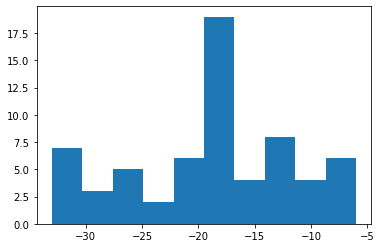

In [48]:
plt.hist(overlaps)

3898
-33


(array([3.112e+03, 3.700e+01, 3.400e+01, 2.000e+01, 2.500e+01, 1.900e+01,
        4.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ -33.  ,  163.55,  360.1 ,  556.65,  753.2 ,  949.75, 1146.3 ,
        1342.85, 1539.4 , 1735.95, 1932.5 , 2129.05, 2325.6 , 2522.15,
        2718.7 , 2915.25, 3111.8 , 3308.35, 3504.9 , 3701.45, 3898.  ]),
 <BarContainer object of 20 artists>)

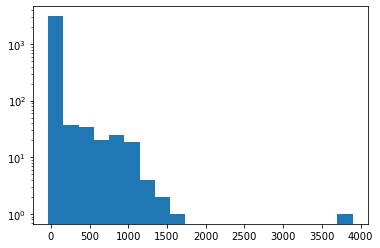

In [49]:
print(max(lapList))
print(min(lapList))

plt.hist(lapList, log=True, bins=20)

In [50]:
#rb_dfold = rb_df.copy()
rb_df = finalDF.copy()

In [218]:
rb_df[rb_df['Color']=='lime']

,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
164,0,HG01890:28802873-28803132,C,260,28802873,28803132,lime,0
167,1,HG01890:28806447-28806706,C,260,28806447,28806706,lime,0
169,2,HG01890:28810021-28810280,C,260,28810021,28810280,lime,0
171,3,HG01890:28813595-28813854,C,260,28813595,28813854,lime,0
177,4,HG01890:28824287-28824546,C,260,28824287,28824546,lime,0
409,5,HG01890:29594123-29594687,C,565,29594123,29594687,lime,0
429,6,HG01890:29661251-29661815,C,565,29661251,29661815,lime,0
432,7,HG01890:29668289-29668313,+,25,29668289,29668313,lime,0
483,8,HG01890:29857043-29857202,+,160,29857043,29857202,lime,1
515,9,HG01890:29962116-29962510,+,395,29962116,29962510,lime,1


# Export and update

In [174]:
tempDF.at[0,'Start']=28753268
tempDF.at[0,'Length']= (29823870-28753268)
tempDF

,Block_Number,Block_Type,Length,Start,End,SampleName
0,0,Spacer Block,1070602,28753268,29823870,HG01890
1,0,Repeat Block,33171,29823871,29857041,HG01890
2,1,Spacer Block,346280,29857042,30203321,HG01890
3,1,Repeat Block,91927,30203322,30295248,HG01890
4,2,Spacer Block,350083,30295249,30645331,HG01890
5,2,Repeat Block,21037,30645332,30666368,HG01890
6,3,Spacer Block,1429077,30666369,32095445,HG01890
7,3,Repeat Block,231357,32095446,32326802,HG01890
8,4,Spacer Block,974982,32326803,33301784,HG01890
9,4,Repeat Block,273794,33301785,33575578,HG01890


In [3]:
rb_df = pd.read_csv("/home/mark/Desktop/chromosome_y/DYZ1_Region_Analysis/Block_Sequences/HG01890/Finalized_Fragmentdf.csv")
rb_df

,Unnamed: 0,index,Fragment,Orientation,Length,Start,End,Color,SpacerBlock
0,0,21,HG01890:28322352-28526651,C,2850,28322354,28325204,grey,0
1,1,36,HG01890:28322352-28526651,C,2827,28325206,28328033,grey,0
2,2,64,HG01890:28322352-28526651,C,2861,28328035,28330896,grey,0
3,3,47,HG01890:28322352-28526651,C,2846,28330898,28333744,grey,0
4,4,3,HG01890:28322352-28526651,C,2862,28333746,28336608,grey,0
...,...,...,...,...,...,...,...,...,...
3267,3267,2810,HG01890:45822762-46041949,C,3493,46024225,46027718,black,17
3268,3268,2804,HG01890:45822762-46041949,C,3503,46027719,46031222,black,17
3269,3269,2814,HG01890:45822762-46041949,C,3503,46031223,46034726,black,17
3270,3270,2798,HG01890:45822762-46041949,C,3543,46034727,46038270,black,17


In [5]:
set(rb_df['SpacerBlock'])

{0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [4]:
import collections
print(collections.Counter(rb_df['SpacerBlock']))

Counter({0: 458, 3: 422, 4: 277, 14: 269, 7: 241, 9: 224, 5: 204, 16: 188, 8: 155, 15: 144, 12: 125, 11: 123, 1: 102, 2: 100, 13: 94, 10: 83, 17: 63})


In [176]:
#tempDF.to_csv("/home/mark/Desktop/chromosome_y/Dataframes/HG01890/BlockSize_dataframe.csv")

## Visualize

In [52]:
import turtle

In [53]:
turtle.position()
turtle.color('black')
turtle.speed(0)
flag=1
groupFlag = 0
#groupNames = list(goodAluGroupDict.keys())
lengthFlag = 0

startPosition = turtle.position()
turtle.color("white")
turtle.setposition(turtle.pos()[0], turtle.pos()[1]+300)
turtle.color("black")
turtle.write("HG01890 Yq Heterochromatin Spacer Blocks", align="Left")
turtle.color("white")
turtle.setposition(startPosition)

for key in tqdm(list(set(rb_df['SpacerBlock']))):
    
    totalAlus = len(rb_df[rb_df['SpacerBlock']==key])
        
    turtle.color("black")
    turtle.forward(75)
    currentPosition = turtle.position()
    

    if lengthFlag == 0:
        turtle.setposition(currentPosition)
    else:
        #turtle.setposition(turtle.pos()[0]-10, turtle.pos()[1]+20)
        #turtle.write(str(BlockListDistance[key]), align="right")
        turtle.setposition(currentPosition)

    currentPosition = turtle.position()
    if (flag % 2) == 0:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]-200)
    else:
        turtle.setposition(turtle.pos()[0], turtle.pos()[1]+200)
        
    turtle.write(" Spacer Block: "+str(key), align="left")

    turtle.setposition(currentPosition)
    

    groupFlag+=1
    lengthFlag+=1
    flag+=1
    
    tempDF = rb_df[rb_df['SpacerBlock']==key].copy() 
    for item in tempDF.index:
        
        if tempDF.at[item,'Orientation'] == 'C':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(1)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(.5)
        
        elif tempDF.at[item,'Orientation'] == '+':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)

        elif tempDF.at[item,'Orientation'] == 'temp':
            turtle.color(tempDF.at[item,'Color'])
            turtle.forward(.5)
            turtle.left(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.right(90)
            turtle.forward(1)
            turtle.right(90)
            turtle.forward(tempDF.at[item,'Length']/20)
            turtle.left(90)
            turtle.forward(.5)
        
        else:
            turtle.color('black')
            turtle.forward(.5)


100%|███████████████████████████████████████████| 17/17 [06:18<00:00, 22.26s/it]


In [54]:
from PIL import Image

In [55]:
def save_as_png(canvas,fileName):
    # save postscipt image 
    canvas.postscript(file = fileName + '.eps') 
    # use PIL to convert to PNG 
    img = Image.open(fileName + '.eps') 
    img.save(fileName + '.png', 'png') 

In [56]:
ts = turtle.getscreen()
save_as_png(ts.getcanvas(),"/home/mark/Desktop/chromosome_y/Images/HG01890/HG01890_YqHeterochromatin_DYZ1_HMMER_Finalized")

In [57]:
turtle.bye()